In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")
np.random.seed(5)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFC
import tensorflow as tf
tf.get_logger().setLevel(40) # suppress deprecation messages
from tensorflow.keras.layers import Dense, Input, Embedding, Concatenate, Reshape, Dropout, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [35]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()
data = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
data['target'] = breast_cancer_data.target

In [36]:
data.shape

(569, 31)

Data Distribution


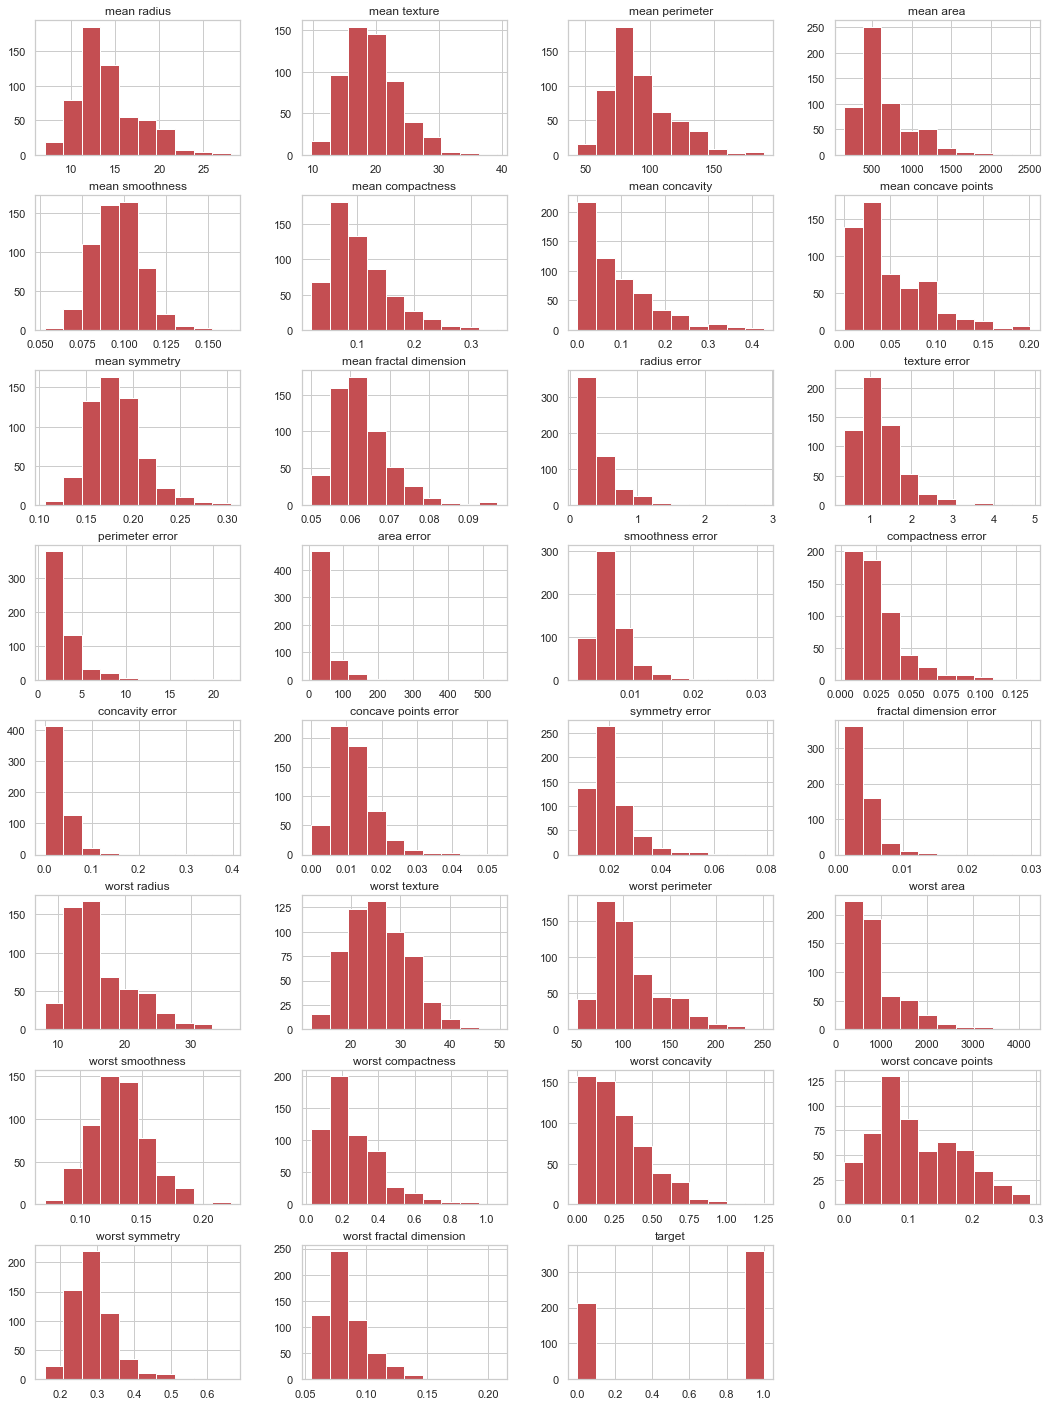

In [44]:
data.hist(layout = (8,4), figsize=(18,25), color = 'r')
print('Data Distribution')

This looks like a fairly imbalanced dataset


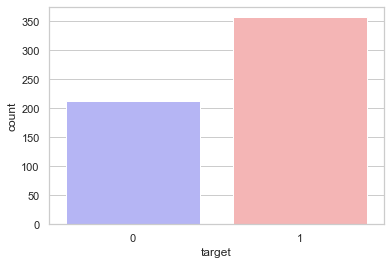

In [46]:
print('This looks like a fairly imbalanced dataset')
sns.countplot(x="target", data=data, palette="bwr")
plt.show()

In [47]:
data['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [49]:
print('Percentage of data belonging to class 1 is',float((357/(357+212))*100))
print('Percentage of data belonging to class 0 is',float((212/(357+212))*100))

Percentage of data belonging to class 1 is 62.741652021089635
Percentage of data belonging to class 0 is 37.258347978910365


In [50]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [51]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

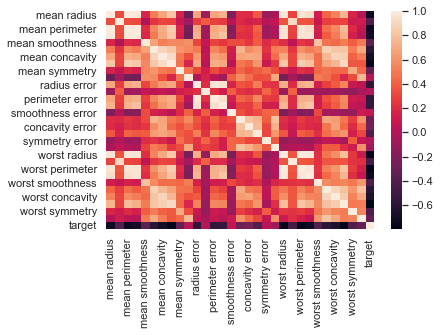

In [52]:
print(data.corr()['target'])
sns.heatmap(data.corr())
plt.show()

### Outlier Check

In [56]:
Q1 = df['mean area'].quantile(0.25)
Q3 = df['mean area'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['mean area'] < lower_bound) | (df['mean area'] > upper_bound)]
df_no_outliers = df[~df.index.isin(outliers.index)]

### Noise removal

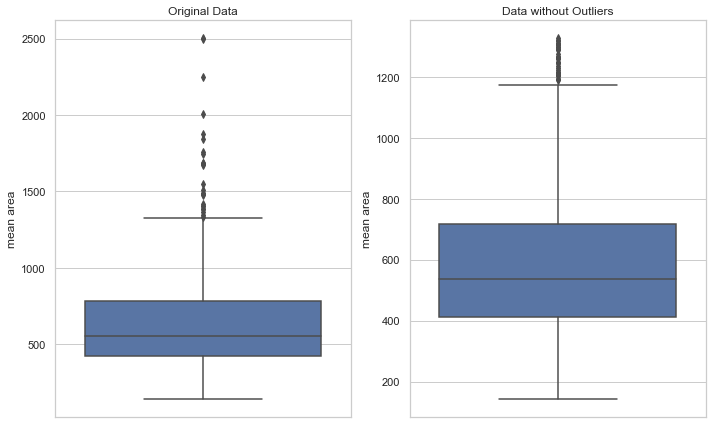

In [57]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['mean area'])
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_no_outliers['mean area'])
plt.title('Data without Outliers')

plt.tight_layout()
plt.show()

In [59]:
feature_engg_data = df_no_outliers.copy()
outlier_data = df_no_outliers.copy()
factor = 3
# Include this only for columns with suspected outliers
# Using a factor of 3, following Nelson's rule 1 to remove outliers - https://en.wikipedia.org/wiki/Nelson_rules
# Only for non-categorical fields
columns_to_include = ['mean radius','mean texture','mean perimeter','mean concavity','mean concave points']
for column in columns_to_include:
    upper_lim = feature_engg_data[column].mean () + feature_engg_data[column].std () * factor
    lower_lim = feature_engg_data[column].mean () - feature_engg_data[column].std () * factor
    feature_engg_data = feature_engg_data[(feature_engg_data[column] < upper_lim) & (feature_engg_data[column] > lower_lim)]
    
outlier_data = pd.concat([outlier_data, feature_engg_data]).drop_duplicates(keep=False)

print(feature_engg_data.shape)
print(outlier_data.shape)

(529, 31)
(15, 31)


In [60]:
def normalize_data(df):
    val = df.values 
    min_max_normalizer = preprocessing.MinMaxScaler()
    norm_val = min_max_normalizer.fit_transform(val)
    df2 = pd.DataFrame(norm_val, columns=df.columns)
    
    return df2

norm_feature_engg_data = normalize_data(feature_engg_data)
norm_outlier_data = normalize_data(outlier_data)

In [62]:
input_data = norm_feature_engg_data.drop(['target'],axis='columns')
targets =norm_feature_engg_data.filter(['target'],axis='columns')

x, x_test, y, y_test = train_test_split(input_data,targets,test_size=0.1,train_size=0.9, random_state=5)
x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size = 0.22,train_size =0.78, random_state=5)

In [63]:
def apply_RFC(X,y,columns):
    rfc = RFC(n_estimators=500,min_samples_leaf=round(len(X)*.01),random_state=5,n_jobs=-1)
    imp_features = rfc.fit(X,y).feature_importances_ 
    imp_features = pd.DataFrame(imp_features,columns=['Feature Importance'],index=columns)
    imp_features.sort_values(by=['Feature Importance'],inplace=True,ascending=False)
    imp_features['Moving Sum'] = imp_features['Feature Importance'].cumsum()
    imp_features = imp_features[imp_features['Moving Sum']<=0.95]
    top_features = imp_features.index.tolist()
    return imp_features, top_features

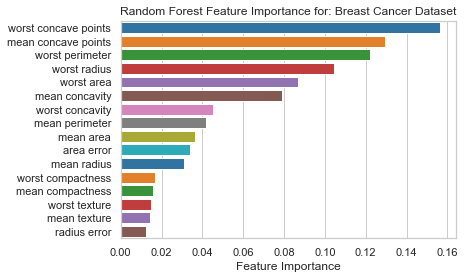

In [64]:
important_features, top_features = apply_RFC(x,y, data.columns.drop('target'))
sns.barplot(important_features['Feature Importance'], important_features.index, palette = 'tab10')
plt.title('Random Forest Feature Importance for: '+"Breast Cancer Dataset")
plt.show()

### Feature importance using permutation importance

Feature: 0, Score: 0.04800
Feature: 1, Score: 0.05860
Feature: 2, Score: 0.05140
Feature: 3, Score: 0.09280
Feature: 4, Score: 0.05320
Feature: 5, Score: 0.06240
Feature: 6, Score: 0.06860
Feature: 7, Score: 0.05960
Feature: 8, Score: 0.05360
Feature: 9, Score: 0.03240


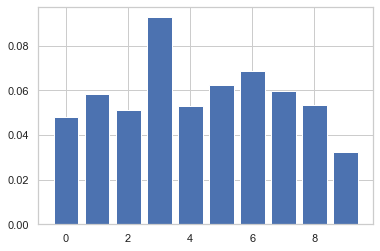

In [65]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Sensitivity Analysis

In [67]:
def model():
    '''
    Simple 3 layered Neural Network model for binary classification
    '''
    inp = Input(shape=(x_train.shape[1],))
    x = Dense(40, activation='relu')(inp)
    x = Dense(40, activation='relu')(x)
    op = Dense(2, activation='softmax')(x)
    model = Model(inputs=inp, outputs=op)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = model()
model.fit(x_train, to_categorical(y_train), batch_size=64, epochs=100, verbose=0)

In [68]:
# Evaluate the trained model
model.evaluate(x_test, to_categorical(y_test))[1]

2/2 [==============================] - 0s 4ms/step - loss: 0.2474 - accuracy: 0.9623


0.9622641801834106

In [69]:
query_instance = x_test.iloc[5].values.reshape((1,) + x_test.iloc[5].shape)
print("Let's take a look at the normalized query data instance in which all the features are in the range of (0.0 - 1.0):" )
df_query = pd.DataFrame(query_instance, columns = input_data.columns)
df_query

Let's take a look at the normalized query data instance in which all the features are in the range of (0.0 - 1.0):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.401866,0.318896,0.415488,0.281776,0.383768,0.497959,0.529856,0.345896,0.516162,0.490522,...,0.301702,0.292818,0.347606,0.178688,0.30595,0.367523,0.418462,0.496853,0.328405,0.317198


In [70]:
predicted_outcome = np.argmax(model.predict(query_instance))
true_label = int(y_test.iloc[5][0])
print(f" The true label is : {true_label}")
print(f" The predicted outcome is : {predicted_outcome}")

1/1 [==============================] - 0s 51ms/step
 The true label is : 1
 The predicted outcome is : 1


In [72]:
sigma_1 = np.std(x['worst concave points'])
sigma_2 = np.std(x['mean concave points'])
sigma_3 = np.std(x['worst perimeter'])
sigma_4 = np.std(x['worst radius'])
sigma_5 = np.std(x['worst area'])
sigma_6 = np.std(x['mean concavity'])
sigma_7 = np.std(x['worst concavity'])

1/1 [==============================] - 0s 20ms/step


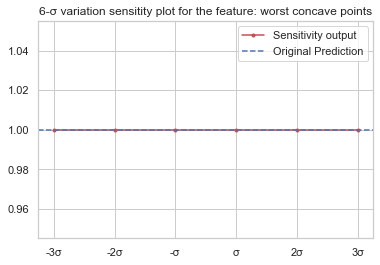

1/1 [==============================] - 0s 19ms/step


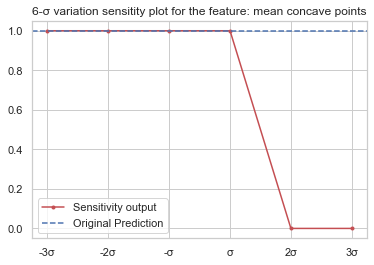

1/1 [==============================] - 0s 21ms/step


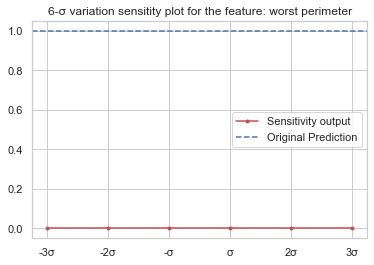

1/1 [==============================] - 0s 22ms/step


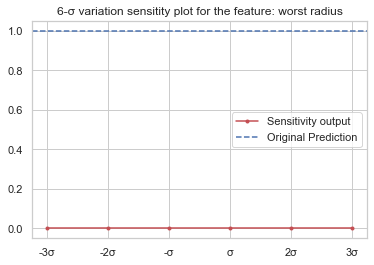

1/1 [==============================] - 0s 19ms/step


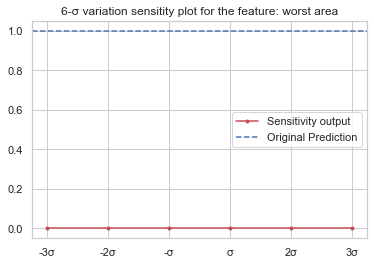

1/1 [==============================] - 0s 19ms/step


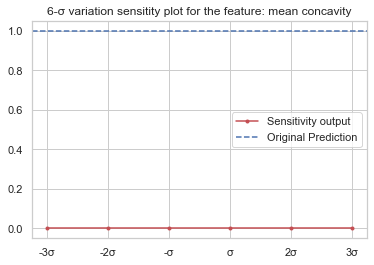

1/1 [==============================] - 0s 26ms/step


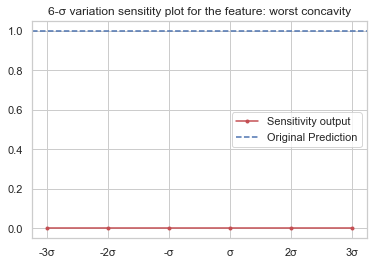

In [73]:
def sensitivity_analysis_plot(measure_tuple):
    '''
    Sensitivity Analysis plot using the 6-σ variation method
    '''
    (measure, sigma) = measure_tuple

    sensitivity_output = []
    original_value = df_query[measure].copy()
    for k in [-3, -2, -1, 1, 2, 3]:
        df_query[measure] = original_value.copy()
        df_query[measure] = np.clip(df_query[measure] + k * sigma, 0.0, 1.0)
        sensitivity_output.append(np.argmax(model.predict(df_query.values)))
    plt.plot(['-3σ', '-2σ', '-σ', 'σ', '2σ', '3σ'], sensitivity_output, 'r.-', label = 'Sensitivity output')
    plt.axhline(y = predicted_outcome, color = 'b', linestyle = '--', label = 'Original Prediction')
    plt.title(f'6-σ variation sensitity plot for the feature: {measure}')
    plt.legend()
    plt.show()
    
measure_tuple_list = [('worst concave points', sigma_1),
                     ('mean concave points', sigma_2),
                     ('worst perimeter', sigma_3),
                     ('worst radius', sigma_4),
                     ('worst area', sigma_5),
                     ('mean concavity', sigma_6),
                     ('worst concavity', sigma_7)]

for measure_tuple in measure_tuple_list:
    sensitivity_analysis_plot(measure_tuple)

In [78]:
print(sns.__version__)

0.11.1
